**AI PROJECT: Garbage Classification using CNN**

**Group Members:**

1. 20L-1184 Section 6A

2. 20L-1210 Section 6A

3. 20L-2164 Section 6D

<Note: Run this project in Google Collaboratory since it uses google drive>

**DATASET LINK**: https://drive.google.com/drive/folders/1GDSE1CVpuOUZXx9LyQ2kCfESix40-1Ul?usp=sharing


We gathered a dataset containing close to 3000 total images of plastic, metal and paper waste. To use it, you need to create a shortcut of the "Final_Dataset" folder to "My Drive". Upon running the code, you will be asked to choose your google account whose Drive will be mounted.

**Data Pre-Processing:**

This code is performing the following pre-processing steps on the image dataset:

* Reading images using cv2.imread() method
* Converting the color format from BGR to RGB using cv2.COLOR_BGR2RGB method
* Resizing the images to a fixed size (IMG_HEIGHT, IMG_WIDTH) using cv2.resize() method with interpolation=cv2.INTER_AREA
* Converting the images to a numpy array using np.array() method
* Converting the data type of images to float64 using image.astype('float64') method
* Normalizing the pixel values in the range [0, 1] by dividing each pixel value by 255
* Storing the images as numpy arrays in img_data_array
* Reshape image to (200,200,3)
* Storing the class labels in class_name

**Model Training & Testing**

This code segment defines and sets up a Convolutional Neural Network (CNN) model for image classification. Here are the steps it performs:

* The code defines a class called `CNNNet` that inherits from the `nn.Module` class, which is the base class for all neural network modules in PyTorch.
* Inside the `CNNNet` class, the model architecture is defined in the `__init__` method. The architecture consists of two main parts: `cnn_layers` and `linear_layers`.
* The `cnn_layers` are defined using the `nn.Sequential` container, which allows stacking multiple layers sequentially. The layers in `cnn_layers` are as follows:
   - `nn.Conv2d`: A 2D convolutional layer with 3 input channels, 16 output channels, a kernel size of (5, 5), a stride of (2, 2), and padding of (2, 2).
   - `nn.ReLU`: Activation function ReLU (Rectified Linear Unit) is applied element-wise to introduce non-linearity.
   - `nn.MaxPool2d`: A 2D max pooling layer with a kernel size of 2 and stride 2, which reduces the spatial dimensions of the input by taking the maximum value in each pooling region.
   - Another `nn.Conv2d` layer with 16 input channels (output from the previous layer), 3 output channels, a kernel size of (50, 50), and a stride of (1, 1).
   - Another `nn.MaxPool2d` layer with a kernel size of 1 and stride 1, effectively not reducing the spatial dimensions further.
* The `linear_layers` are defined using another `nn.Sequential` container, containing a single `nn.Linear` layer. This layer takes the output from the previous layers and performs a linear transformation.
* The `forward` method of the `CNNNet` class defines the forward pass of the model. It takes an input tensor `x` and passes it through the `cnn_layers` sequentially. Then, the output is reshaped using `x.view(x.size(0), -1)` to flatten the tensor, preserving the batch size but collapsing the spatial dimensions. Finally, the flattened tensor is passed through the `linear_layers` to produce the output.
* After defining the model architecture, an instance of the `CNNNet` class is created and assigned to the `model` variable.
* The code defines an optimizer using stochastic gradient descent (SGD) with a learning rate of 0.0001. The optimizer is initialized with the parameters of the `model` using `model.parameters()`.
* A loss function is defined using cross-entropy loss (`nn.CrossEntropyLoss`). This loss function is commonly used for multi-class classification problems.
* The model is then trained and tested for the given architecture, epochs = 100



In [ ]:
!pip install opencv-python-headless

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing Necessary files to read Images
import pandas as pd
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ROOT_DIR = "gdrive/MyDrive/dataset_final/"


In [ ]:
#Printing random images from the dataset
import os

Training_folder = ROOT_DIR + "training"
os.listdir(Training_folder)


['metal', 'plastic', 'paper']

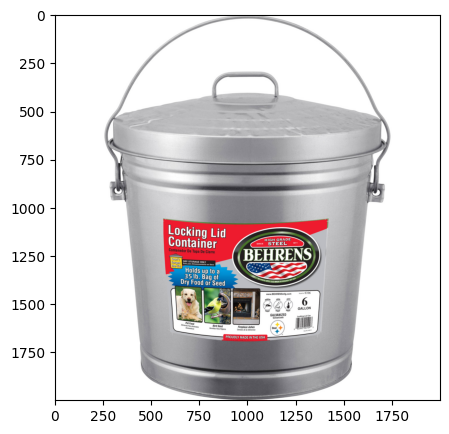

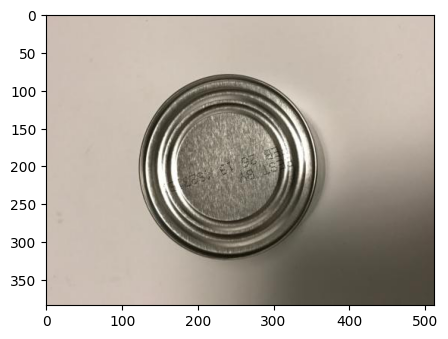

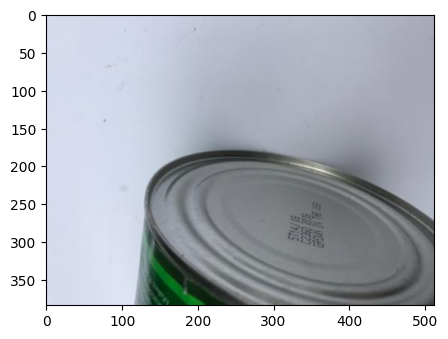

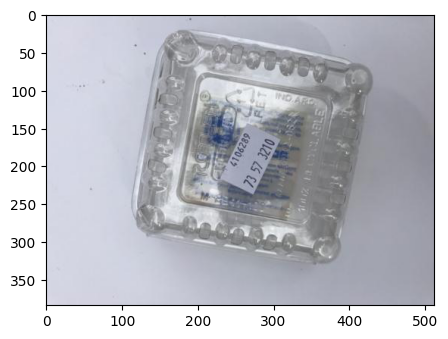

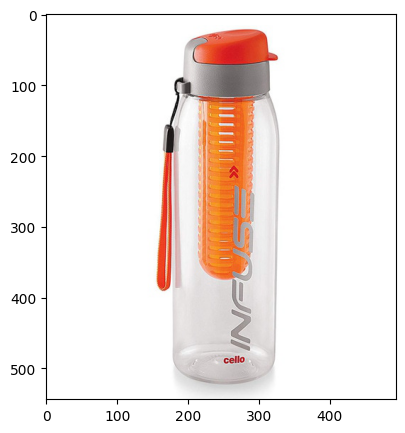

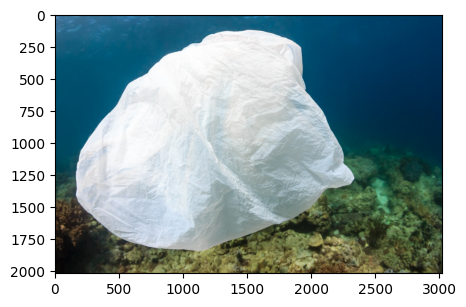

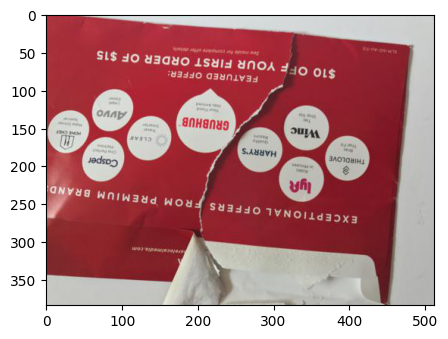

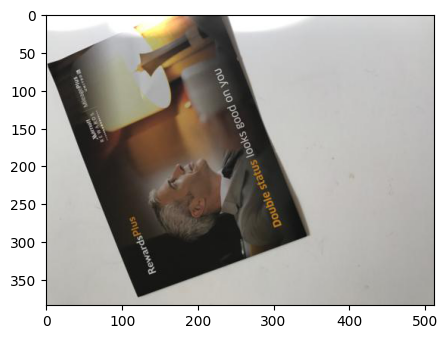

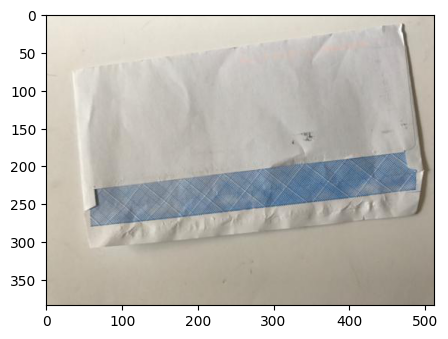

In [ ]:

for path in os.listdir(Training_folder):
    for i in range(3):
        temp_path = Training_folder+"/"+path
        file = random.choice(os.listdir(temp_path))
        image_path= os.path.join(temp_path, file)
        img=mpimg.imread(image_path)
        plt.figure(figsize=(5,5))
        plt.imshow(img)


In [ ]:
#Setting the Image dimension and source folder for loading the dataset
IMG_WIDTH=200
IMG_HEIGHT=200

#train and test folders
Train_folder=ROOT_DIR+'training'
Test_folder=ROOT_DIR+'testing'

#Creating the image data and the labels from the images

def create_dataset(Train_folder):
    img_data_array=[]
    class_name=[]
    classes = {'metal': [1,0,0], 'plastic': [0,1,0], 'paper': [0,0,1]}
    for PATH in os.listdir(Train_folder):
        for file in os.listdir(os.path.join(Train_folder, PATH)):
            image_path= os.path.join(Train_folder, PATH,  file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float64')
            image /= 255
            if len(image.shape) == 3:
                img_data_array.append(np.array(image).reshape([3, 200, 200]))
                class_name.append(classes[PATH])
    return img_data_array, class_name

In [ ]:
#extract the image array and class name for training data
Train_img_data, train_class_name = create_dataset(Train_folder)

#extract the image array and class name for testing data
Test_img_data, test_class_name =create_dataset(Test_folder)

len(Train_img_data)

2919

In [ ]:
train_class_name[2000]

[0, 1, 0]

In [ ]:
Train_img_data[0]

array([[[0.83137255, 0.83921569, 0.84313725, ..., 0.77647059,
         0.77647059, 0.77647059],
        [0.77647059, 0.77647059, 0.77647059, ..., 0.76078431,
         0.76078431, 0.75294118],
        [0.76078431, 0.76078431, 0.75294118, ..., 0.72941176,
         0.72941176, 0.75294118],
        ...,
        [0.65490196, 0.65490196, 0.64705882, ..., 0.63529412,
         0.63137255, 0.63921569],
        [0.82352941, 0.82352941, 0.82745098, ..., 0.33333333,
         0.31372549, 0.3372549 ],
        [0.3372549 , 0.34509804, 0.37647059, ..., 0.65882353,
         0.65882353, 0.64705882]],

       [[0.65490196, 0.65490196, 0.64705882, ..., 0.63137255,
         0.62745098, 0.63529412],
        [0.81960784, 0.81568627, 0.82352941, ..., 0.3372549 ,
         0.30588235, 0.33333333],
        [0.33333333, 0.36078431, 0.39215686, ..., 0.65882353,
         0.65882353, 0.64705882],
        ...,
        [0.5372549 , 0.43137255, 0.43529412, ..., 0.43529412,
         0.43529412, 0.40392157],
        [0.4

In [ ]:
#Implementing a CNN in PyTorch
#importing necessary libraries
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.utils.data as Data
from torch import Tensor
from torch.autograd import Variable

In [ ]:
#converting np arrays to tensors

torch_dataset_train = Data.TensorDataset(Tensor(np.array(Train_img_data)), Tensor(np.array(train_class_name)))
torch_dataset_test = Data.TensorDataset(Tensor(np.array(Test_img_data)), Tensor(np.array(test_class_name)))

In [ ]:
#defining trainloader and testloader
trainloader = torch.utils.data.DataLoader(torch_dataset_train, batch_size=8, shuffle=True)
testloader = torch.utils.data.DataLoader(torch_dataset_test, batch_size=8, shuffle=True)

In [ ]:
#shape of training data
dataiter = iter(trainloader)
images = next(dataiter)
images[0].shape

torch.Size([8, 3, 200, 200])

In [ ]:
# defining the model architecture
class CNNNet(nn.Module):
  def __init__(self):
      super(CNNNet, self).__init__()

      self.cnn_layers = nn.Sequential(
          # Defining a 2D convolution layer
          nn.Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2)),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
          nn.Conv2d(16, 3, kernel_size=(50, 50), stride=(1, 1)),
          nn.MaxPool2d(kernel_size=1, stride=1, padding=0, ceil_mode=False)
      )

      self.linear_layers = nn.Sequential(
          nn.Linear(3, 3)
      )

  # Defining the forward pass
  def forward(self, x):
      x = self.cnn_layers(x)
      x = x.view(x.size(0), -1)
      x = self.linear_layers(x)
      return x


#define the optimizer and loss function
# defining the model
model = CNNNet()
# defining the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)
# defining the loss function
criterion = nn.CrossEntropyLoss()
# checking if GPU is available
print(torch.cuda.is_available())
if torch.cuda.is_available():
    model = model.to("cuda")
    criterion = criterion.to("cuda")

print(model)


True
CNNNet(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 3, kernel_size=(50, 50), stride=(1, 1))
    (4): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=3, out_features=3, bias=True)
  )
)


In [ ]:
!export CUDA_LAUNCH_BLOCKING=1

In [ ]:
#train this model for 100 epochs
for i in range(100):

    running_loss = 0
    model.train() # indicator for training phase
    for images, labels in trainloader:

        if torch.cuda.is_available():
          images = images.to("cuda")
          labels = labels.to("cuda")

        # Training pass
        optimizer.zero_grad()

        output = model(images)

        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(i+1, running_loss/len(trainloader)))

Epoch 1 - Training loss: 1.0121138442052553
Epoch 2 - Training loss: 0.9568107485771179
Epoch 3 - Training loss: 0.9248464763981022
Epoch 4 - Training loss: 0.8924302922536249
Epoch 5 - Training loss: 0.8663764676819109
Epoch 6 - Training loss: 0.8353576211896662
Epoch 7 - Training loss: 0.8159394445484631
Epoch 8 - Training loss: 0.7969692500486766
Epoch 9 - Training loss: 0.7745067251055208
Epoch 10 - Training loss: 0.7565544953901474
Epoch 11 - Training loss: 0.7401023062124644
Epoch 12 - Training loss: 0.7208821380791599
Epoch 13 - Training loss: 0.7002941626391999
Epoch 14 - Training loss: 0.6825531169568022
Epoch 15 - Training loss: 0.6655605070395012
Epoch 16 - Training loss: 0.6420315066429033
Epoch 17 - Training loss: 0.6280397757683714
Epoch 18 - Training loss: 0.614233815057637
Epoch 19 - Training loss: 0.6041727213826898
Epoch 20 - Training loss: 0.5813529648601192
Epoch 21 - Training loss: 0.5652247722426506
Epoch 22 - Training loss: 0.5528407384883868
Epoch 23 - Training 

In [ ]:
filepath = './output/'+"model.pt"
torch.save(model.state_dict(), filepath)

In [ ]:
#prediction
y_pred_list = []
y_true_list = []
with torch.no_grad():
    for x_batch, y_batch in testloader:
        x_batch, y_batch = x_batch.to("cuda"), y_batch.to("cuda")
        y_test_pred = model(x_batch)
        print(y_test_pred)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.extend(y_pred_tag.cpu().numpy())
        y_true_list.extend(y_batch.cpu().numpy())

tensor([[-2.1463,  9.0905, -8.2164],
        [ 3.1274,  0.9130, -4.6600],
        [-0.0625, -1.1360,  0.6773],
        [-3.3931, -3.4727,  6.5142],
        [-3.2843, -1.1585,  3.8462],
        [-3.8859,  0.5911,  2.7000],
        [ 9.0984, -2.9254, -6.5173],
        [-3.8687, -1.3396,  4.6387]], device='cuda:0')
tensor([[ -4.5447,   1.2179,   2.5976],
        [  8.8108,  -5.0995,  -3.8810],
        [ -5.4583,  -1.4910,   6.3534],
        [ -1.4889,   3.7816,  -3.1187],
        [ -7.0340,   3.4569,   2.6551],
        [ -2.4929,   1.5581,   0.1841],
        [ -1.3757,  -2.8974,   3.8786],
        [-13.5193,   4.1292,   8.4255]], device='cuda:0')
tensor([[-2.8552,  2.1155,  0.0424],
        [-0.9896,  0.1235,  0.2926],
        [ 1.1642, -1.8006,  0.2151],
        [ 6.4960, -1.4014, -5.5884],
        [-3.2576, -4.1339,  7.0455],
        [-2.2967, -5.9727,  8.0136],
        [-0.5217, -6.3344,  6.7110],
        [-0.5999,  2.3324, -2.5509]], device='cuda:0')
tensor([[ 4.9031,  0.4454, -5.8650

In [ ]:
#y_test
y_true_list_max = [m.argmax() for m in y_true_list]

In [ ]:
#Accuracy of model
correct_count, all_count = 0, 0
for i in range(len(y_pred_list)):
    if(y_pred_list[i] == y_true_list_max[i]):
      correct_count += 1
    all_count += 1
print("\nModel Accuracy =", (correct_count/all_count))


Model Accuracy = 0.6760259179265659
